# Problem Session 11
## A Pumpkin Seeds Neural Network

This notebook will serve as an introduction to our neural network content. In particular, this material will touch on the following lecture notebooks:
- `Lectures/Neural Networks/1. Perceptrons`,
- `Lectures/Neural Networks/2. The MNIST Data Set`,
- `Lectures/Neural Networks/3. Multilayer Neural Networks` and
- `Lectures/Neural Networks/4. keras`.

Note that while you may be completing this problem session prior to the live neural networks lecture, the goal is to make this notebook as understandable as possible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 1. `keras` check

In order to run some of the code in this notebook you will need to have `keras` properly installed. `keras` is the python package that we will use to build neural networks in this boot camp. 

##### a. 

Try and run the following to check that you have keras installed.

In [2]:
## Try this first
import keras

## If that does not work, try this
# from tensorflow import keras

In [3]:
## When I wrote this notebook I had version 2.11
print(keras.__version__)

2.15.0


If you do not have `keras` installed, you can try:
- Running `pip install keras` in your command prompt/terminal,
- Running `conda install keras` in your command prompt/terminal,
- Following the directions on the Erd&#337;s Institute website for installing with Anaconda Navigator, or
- Following the installation directions at <a href="https://keras.io/getting_started/">https://keras.io/getting_started/</a>.

Note that individuals using an Apple computer with M1 or M2 chips may need to set up a new conda environment with `keras` as an initial install.

#### 2. Load the data

In this notebook you will work to build neural network models to make predictions on the pumpkin seed data featured in the previous three notebooks. 

##### a.

Load and prepare that data using the code below.

In [4]:
seeds = pd.read_excel("../../Data/Pumpkin_Seeds_Dataset.xlsx")

seeds['y'] = 0

seeds.loc[seeds.Class=='Ürgüp Sivrisi', 'y']=1

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
seeds_train, seeds_test = train_test_split(seeds.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.1,
                                              stratify=seeds.y.values)

##### b.

While probably not needed for this problem, it is common to use a validation set for neural network model building instead of cross-validation. This is because neural networks can take a long time to train. To help you practice that step for the neural networks we will examine in lecture make a validation set for the pumpkin seed data.

##### Sample Solution

In [7]:
seeds_tt, seeds_val = train_test_split(seeds_train,
                                       shuffle=True,
                                       random_state=294,
                                       test_size=.15,
                                       stratify=seeds_train.y)

##### c.

Neural networks are a model type where differing data scales can greatly impact performance. Fit a `StandardScaler` on the training set from the validation split. Then transform the two sets using that scaler. Store the transformed data in `X_tt` and `X_val` respectively. Then also store the labels in `y_tt` and `y_val`.

##### Sample Solution

In [8]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_tt = scale.fit_transform(seeds_tt[seeds.columns[:-2]].values)


X_val = scale.transform(seeds_val[seeds.columns[:-2]].values)

y_tt = seeds_tt.y.values
y_val = seeds_val.y.values

##### 3. An `sklearn` neural network

In this problem you'll first use `sklearn`'s `MLPClassifier` model which is `sklearn`'s neural network classifier.

##### a. 

Import the `MLPClassifier` from `sklearn.neural_network`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html</a>.

##### Sample Solution

In [9]:
from sklearn.neural_network import MLPClassifier

##### b. 

The `MLPClassifier` is what is known as a <i>feed forward</i> neural network.

The feed forward network you will build in this part looks schematically like this:

<img src="pumpkin_nn.png" width="70%"></img>

The nodes (circles) in the "Input Layer" represent the 12 features for this data set. Each node corresponds to one of the unique features. 

The hidden layers are nodes in which activation functions, $\sigma$, are applied to weighted sums of the previous layer's nodes. For example the value of the topmost node in the first hidden layer would be given by:
$$
\sigma\left( \sum_{i=1}^{12} w_i x_i \right),
$$

for some nonlinear function $\sigma$ and some weights, $w_i$, that would be found through fitting. The arrows from one node to another denote these weighted sums. The output layer gives the prediction of the model.

This network is said to have two hidden layers, each of which are $5$ nodes tall.

To build this network set the `hidden_layer_sizes` argument to `(5,5,)` when defining the `MLPClassifier` object.

Make this model and fit it with the training set from the validation split. Then find the accuracy on the validation set.

##### Sample Solution

In [10]:
## Note you will need to increase the max_iter, 10000 should work
mlp1 = MLPClassifier(hidden_layer_sizes = (5,5,),
                     max_iter = 10000)

mlp1.fit(X_tt, y_tt)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=10000)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(mlp1.predict(X_val), y_val)

0.8698224852071006

##### c.

One way to improve neural network performance is to add more nodes to your hidden layers or to add additional hidden layers. Try some different hidden layer structures and see how the validation accuracies compare to the initial model.

In [13]:
mlp2 = MLPClassifier(hidden_layer_sizes = (10,10),
                    max_iter=10000)

mlp2.fit(X_tt, y_tt)

accuracy_score(mlp2.predict(X_val), y_val)

0.8609467455621301

In [14]:
mlp3 = MLPClassifier(hidden_layer_sizes = (5,5,5),
                     max_iter=10000)

mlp3.fit(X_tt, y_tt)

accuracy_score(mlp3.predict(X_val), y_val)

0.863905325443787

In [15]:
mlp4 = MLPClassifier(hidden_layer_sizes = (10,10,10),
                     max_iter=100000)

mlp4.fit(X_tt, y_tt)

accuracy_score(mlp4.predict(X_val), y_val)

0.8668639053254438

#### 4. Your first `keras` neural network

While `sklearn`'s neural network is relatively easy to use, it is not common for people to use `MLPClassifier` (or `MLPRegressor`) to build neural networks. Instead it is much more common for people to use a python package dedicated to the construction of neural networks. For us that package will be `keras`, <a href="https://keras.io/">https://keras.io/</a>.

In this problem you will build your first neural network made with `keras`.

##### a.

We will start by building the exact same neural network as in <i>3. b.</i>. First we will need to import all of the classes and functions used in the creation of a neural network with `keras`. Run the code chunk below to do so.

In [19]:
## Import the following
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical  # note:  this version should work with the version of keras in the erdos_sp_2024 conda env.


### If you have a newer version of keras ###
#from keras.utils.np_utils import to_categorical


##### b.

Together we will build this `keras` neural network step by step. The first step is to make an empty `Sequential` model. This can be created with `models.Sequential()`. Store this in a variable called `model1`.

##### Sample Solution

In [20]:
model1 = models.Sequential()

##### c.

Now we have to add the hidden layers to our model. The layers we will add are called `Dense` layers in `keras`. The first input to `layers.Dense()` are the number of nodes in the hidden layer. The second input is the type of activation function, the $\sigma$ from above, for us this will be the `'relu'` activation function. The first `Dense` layer also requires an `input_shape` input, this just tells the model how large your input layer is.

In the code chunk below try to add the second `Dense` layer of the hidden layer. I will provide the code for adding the first `Dense` layer.

In [21]:
model1.add(layers.Dense(5, activation='relu', input_shape=(X_tt.shape[1],)))


## Add the second Dense layer here,
## Remember first the number of nodes,
## Then the activation function, but
## do not include an input_shape
model1.add(layers.Dense(5, activation='relu'))


In [22]:
## This will show you the model we have built so far
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 65        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
Total params: 95 (380.00 Byte)
Trainable params: 95 (380.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### d.

After the hidden layer we have to put in the output layer. This is also a `Dense` layer, but there should only be $1$ node and the `activation` function should be the `'sigmoid'`. The sigmoid activation takes the weighted sum and turns it into a probability.

Try adding the output layer. Then check your network with `.summary()`.

In [23]:
model1.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 65        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### e. 

Before fitting a `keras` model you have to `compile` it. Compiling tells the model how you want it to be fit:
- What optimization algorithm to use,
- What `loss` function you want to use, and
- What metrics you want to keep track of.

Run the code chunk below to see how you `compile` a `keras` model.

In [25]:
## Compile the network here with
## the 'rmsprop' optimizer, the 'categorical_crossentropy' loss and
## 'accuracy' as the only metric
model1.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

##### f.

Now we are ready to fit the model.

Neural networks are fit using the method of gradient descent (for more information on that check out the Supervised Learning Gradient Descent lecture notebook). Gradient descent works by randomly cycling through the training observations and updating the current coefficient guesses for the weighted sums. Each time through the training set is called an <i>epoch</i>. When calling `.fit` in `keras` you have to provide the number of epochs. For this example we will use `100`. You will also see an argument called `batch_size`, this controls how many training observations are used at each update set. We will set the `batch_size` to `25`.

Run the code chunk below to train the neural network you built.

In [26]:
## You'll train the model for 40 epochs
n_epochs = 100

## fit the model here
## First the X are input
## Then the y
## then the epochs,
## the batch_size
## and finally we can provide a validation set
## keras is nice and calculates the accuracy on this as the model is trained
history1 = model1.fit(X_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_val, 
                                          y_val))

Epoch 1/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.7097 - val_loss: 0.5682 - val_accuracy: 0.7515
Epoch 2/100
77/77 [==============================] - 0s 511us/step - loss: 0.5134 - accuracy: 0.8091 - val_loss: 0.4710 - val_accuracy: 0.8402
Epoch 3/100
77/77 [==============================] - 0s 491us/step - loss: 0.4309 - accuracy: 0.8577 - val_loss: 0.4018 - val_accuracy: 0.8550
Epoch 4/100
77/77 [==============================] - 0s 482us/step - loss: 0.3706 - accuracy: 0.8755 - val_loss: 0.3554 - val_accuracy: 0.8580
Epoch 5/100
77/77 [==============================] - 0s 468us/step - loss: 0.3289 - accuracy: 0.8818 - val_loss: 0.3274 - val_accuracy: 0.8609
Epoch 6/100
77/77 [==============================] - 0s 472us/step - loss: 0.3052 - accuracy: 0.8870 - val_loss: 0.3155 - val_accuracy: 0.8609
Epoch 7/100
77/77 [==============================] - 0s 469us/step - loss: 0.2953 - accuracy: 0.8860 - val_loss: 0.3127 - val_accuracy: 0.8609
E

##### g.

You may have noticed that we stored the results of `.fit` in a variable called `history1`. `history1` has an attribute called `.history` which contains a dictionary of:
- The loss function on the training set at each epoch stored with the `loss` key,
- The accuracy on the training set at each epoch stored with the `accuracy` key,
- The loss function on the validation set at each epoch stored with the `val_loss` key, and
- The accuracy on the validation set at each epoch stored with the `val_accuracy` key.

Try plotting the training accuracy and the validation accuracy against the epoch below. Then make a similar plot but with the loss function on both sets.

In [27]:
## Demonstrating the dictionary
history1.history

{'loss': [0.6135740280151367,
  0.5134011507034302,
  0.4308544099330902,
  0.3705901801586151,
  0.32892701029777527,
  0.3052477538585663,
  0.29525336623191833,
  0.29084399342536926,
  0.28860101103782654,
  0.28692901134490967,
  0.2859049439430237,
  0.2848282754421234,
  0.2840825915336609,
  0.2835863530635834,
  0.28311946988105774,
  0.2824406325817108,
  0.28196215629577637,
  0.2811639904975891,
  0.28070586919784546,
  0.2803456783294678,
  0.2796165347099304,
  0.2796275317668915,
  0.27924636006355286,
  0.27864161133766174,
  0.27826955914497375,
  0.2781209647655487,
  0.27770131826400757,
  0.27741771936416626,
  0.27717283368110657,
  0.27665162086486816,
  0.27681589126586914,
  0.2764398157596588,
  0.2764192223548889,
  0.2762046754360199,
  0.2760232090950012,
  0.27554401755332947,
  0.2756781578063965,
  0.275348961353302,
  0.2751860022544861,
  0.2751646935939789,
  0.27480027079582214,
  0.2746908366680145,
  0.2746322453022003,
  0.2744523882865906,
  0.274

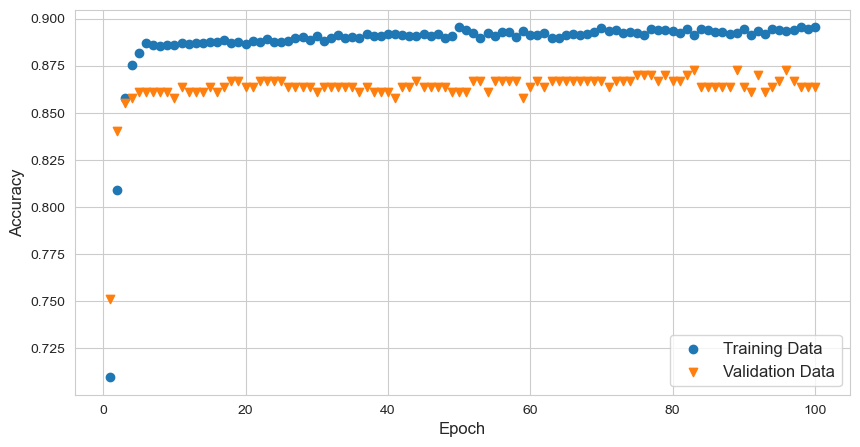

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

plt.scatter(range(1,n_epochs+1), 
            history1.history['accuracy'], 
            label="Training Data")
plt.scatter(range(1,n_epochs+1), 
            history1.history['val_accuracy'], 
            marker='v',
            label="Validation Data")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)


plt.legend(fontsize=12)


plt.show()

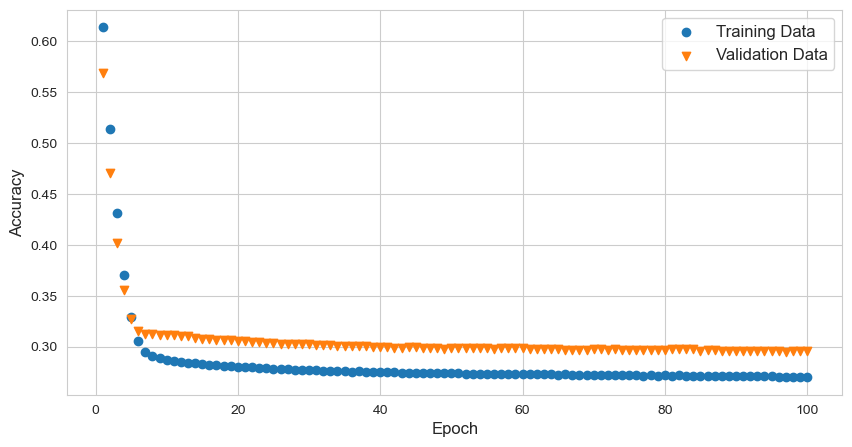

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

plt.scatter(range(1,n_epochs+1), 
            history1.history['loss'], 
            label="Training Data")
plt.scatter(range(1,n_epochs+1), 
            history1.history['val_loss'], 
            marker='v',
            label="Validation Data")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)


plt.legend(fontsize=12)


plt.show()

##### h. 

A common step in neural network training is trying to identify when to stop training the model. This can be done by looking at the two plots you just made and looking for when the validation set performance leveled off.

With that in mind, how many epochs would you choose?

##### Sample Solution

I would say around 40.

#### 5. Building more models

Congratulations! You have successfully built a `keras` model. Feel free to use the remainder of this notebook to play around and build neural networks with different architectures. You may want to compare their performance to `model1`.

You could also test out if using PCA to preprocess your data first would improve the neural networks performance.

In [30]:
## A single hidden layer with 10 nodes
model2 =  models.Sequential()

model2.add(layers.Dense(10, activation='relu', input_shape=(X_tt.shape[1],)))
model2.add(layers.Dense(1, activation='sigmoid'))


model2.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])


history2 = model2.fit(X_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_val, y_val))

Epoch 1/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.5638 - val_loss: 0.5496 - val_accuracy: 0.7574
Epoch 2/100
77/77 [==============================] - 0s 478us/step - loss: 0.4804 - accuracy: 0.8065 - val_loss: 0.4299 - val_accuracy: 0.8462
Epoch 3/100
77/77 [==============================] - 0s 464us/step - loss: 0.3916 - accuracy: 0.8410 - val_loss: 0.3733 - val_accuracy: 0.8580
Epoch 4/100
77/77 [==============================] - 0s 453us/step - loss: 0.3513 - accuracy: 0.8630 - val_loss: 0.3489 - val_accuracy: 0.8580
Epoch 5/100
77/77 [==============================] - 0s 448us/step - loss: 0.3306 - accuracy: 0.8687 - val_loss: 0.3363 - val_accuracy: 0.8521
Epoch 6/100
77/77 [==============================] - 0s 458us/step - loss: 0.3184 - accuracy: 0.8750 - val_loss: 0.3297 - val_accuracy: 0.8432
Epoch 7/100
77/77 [==============================] - 0s 448us/step - loss: 0.3117 - accuracy: 0.8745 - val_loss: 0.3260 - val_accuracy: 0.8432
E

In [31]:
## Two hidden layers with 10 nodes
model3 =  models.Sequential()

model3.add(layers.Dense(10, activation='relu', input_shape=(X_tt.shape[1],)))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))


model3.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])


history3 = model3.fit(X_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_val, y_val))

Epoch 1/100
77/77 [==============================] - 0s 1ms/step - loss: 0.5866 - accuracy: 0.7040 - val_loss: 0.4397 - val_accuracy: 0.8491
Epoch 2/100
77/77 [==============================] - 0s 478us/step - loss: 0.3676 - accuracy: 0.8745 - val_loss: 0.3380 - val_accuracy: 0.8402
Epoch 3/100
77/77 [==============================] - 0s 490us/step - loss: 0.3140 - accuracy: 0.8776 - val_loss: 0.3245 - val_accuracy: 0.8343
Epoch 4/100
77/77 [==============================] - 0s 492us/step - loss: 0.3034 - accuracy: 0.8802 - val_loss: 0.3224 - val_accuracy: 0.8432
Epoch 5/100
77/77 [==============================] - 0s 610us/step - loss: 0.2988 - accuracy: 0.8828 - val_loss: 0.3211 - val_accuracy: 0.8432
Epoch 6/100
77/77 [==============================] - 0s 493us/step - loss: 0.2956 - accuracy: 0.8834 - val_loss: 0.3202 - val_accuracy: 0.8432
Epoch 7/100
77/77 [==============================] - 0s 510us/step - loss: 0.2930 - accuracy: 0.8839 - val_loss: 0.3194 - val_accuracy: 0.8550
E

In [32]:
from sklearn.decomposition import PCA

pca = PCA(3)

X_pca_tt = pca.fit_transform(X_tt)
X_pca_val = pca.transform(X_val)

In [33]:
## Two hidden layers with 5 nodes and PCA data
model4 =  models.Sequential()

model4.add(layers.Dense(5, activation='relu', input_shape=(X_pca_tt.shape[1],)))
model4.add(layers.Dense(5, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))


model4.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])


history4 = model4.fit(X_pca_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_pca_val, y_val))

Epoch 1/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6119 - val_loss: 0.6228 - val_accuracy: 0.6302
Epoch 2/100
77/77 [==============================] - 0s 628us/step - loss: 0.5957 - accuracy: 0.6763 - val_loss: 0.5556 - val_accuracy: 0.7101
Epoch 3/100
77/77 [==============================] - 0s 556us/step - loss: 0.5253 - accuracy: 0.7364 - val_loss: 0.4840 - val_accuracy: 0.7574
Epoch 4/100
77/77 [==============================] - 0s 527us/step - loss: 0.4589 - accuracy: 0.7756 - val_loss: 0.4252 - val_accuracy: 0.7870
Epoch 5/100
77/77 [==============================] - 0s 517us/step - loss: 0.4045 - accuracy: 0.8164 - val_loss: 0.3823 - val_accuracy: 0.8077
Epoch 6/100
77/77 [==============================] - 0s 704us/step - loss: 0.3669 - accuracy: 0.8504 - val_loss: 0.3562 - val_accuracy: 0.8343
Epoch 7/100
77/77 [==============================] - 0s 493us/step - loss: 0.3422 - accuracy: 0.8698 - val_loss: 0.3414 - val_accuracy: 0.8402
E

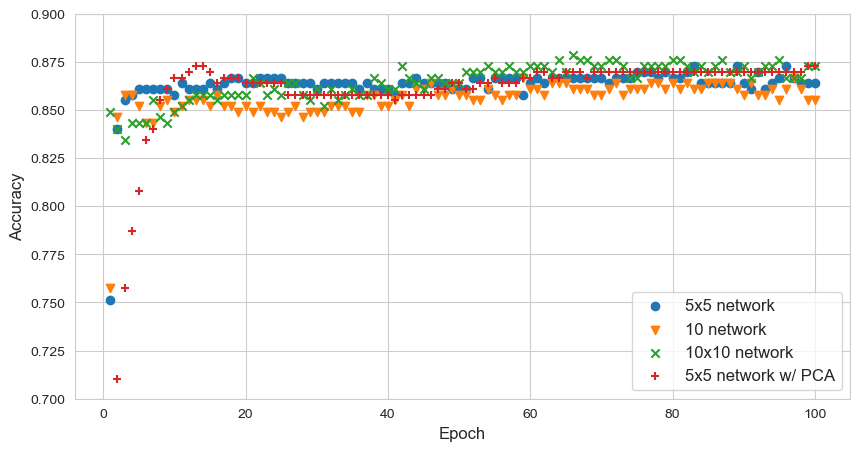

In [34]:
plt.figure(figsize=(10,5))

plt.scatter(range(1,n_epochs+1), 
            history1.history['val_accuracy'], 
            label="5x5 network")

plt.scatter(range(1,n_epochs+1), 
            history2.history['val_accuracy'], 
            marker='v',
            label="10 network")

plt.scatter(range(1,n_epochs+1), 
            history3.history['val_accuracy'], 
            marker='x',
            label="10x10 network")

plt.scatter(range(1,n_epochs+1), 
            history4.history['val_accuracy'], 
            marker='+',
            label="5x5 network w/ PCA")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.ylim(.7,.9)


plt.legend(fontsize=12)


plt.show()

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)